In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [56]:
df=pd.read_csv("Automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [57]:
#there are total 205 rows and 15 columns
#none of the rows has null values 
#2 columns are of float datatype ,5 columns are of int datatype,rest all(8) columns are of object datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [58]:
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [59]:
# this dataset is about second hand cars where basic libraries like numpy,pandas,sklearn while for visualisation matplotlib and seaborn is used
#based on this EDA and prediction using algo are been done
#the dataset includes 205 rows and 15 columns  and missing values has been detacted which is replaced using fillna function
#also the problem statement includes 8 object datatypes which are convereted into numeric data with the help of ordinal encoding   
#and standard scaling is also performed to speed up the machine learning algorithms thus the analysis also includes the outliers whuich are also 
#detacted with the help of boxplot.
#algo used are linear regression which is a supervised learning model and the accuray with this model is 85,79
#2nd algo used is knn regressor which is also supervised learning model and accuray with this model 79,80
#3rd algo used is random forest 

In [60]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [61]:
df["horsepower"].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64

In [62]:
df["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [63]:
features=df.iloc[:,:-1]
target=df.iloc[:,-1] 

In [64]:
features["normalized-losses"].replace("?",np.nan,inplace=True)
features["horsepower"].replace("?",np.nan,inplace=True)

In [65]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27
1,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27
2,1,NaN,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22


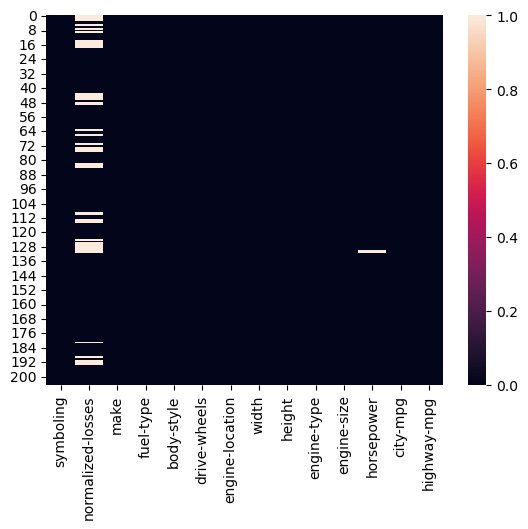

In [66]:
#visualize
#white spaces are showing null values while the black portion is about not null
sns.heatmap(features.isnull())
plt.show()

In [67]:
from sklearn.impute import SimpleImputer 
si=SimpleImputer(missing_values=np.nan,strategy="mean")

features[["normalized-losses","horsepower"]]=si.fit_transform(features[["normalized-losses","horsepower"]])

In [68]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22


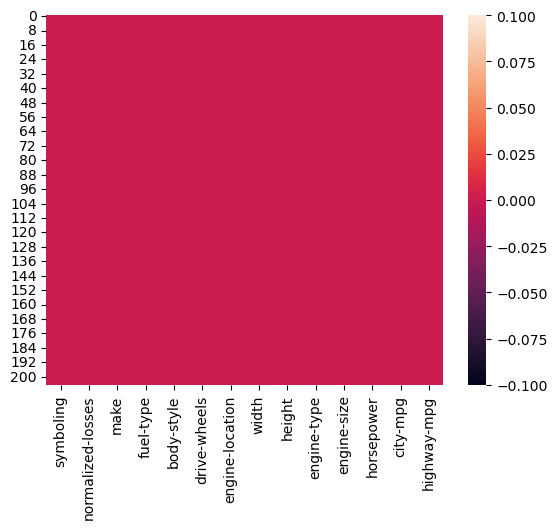

In [69]:
#visualize
#now there is no null values in our complete dataset
sns.heatmap(features.isnull())
plt.show()

In [70]:
#changing the datatype of normalized losses and horsepower
features["normalized-losses"]=features["normalized-losses"].astype("float64")
features["horsepower"]=features["horsepower"].astype("float64")

In [71]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 22.5+ KB


# company wise model manufactured
Maximum model manfactured is of toyota
While least models manufactured is of mercury
Average production is of model honda ,mitsubishi

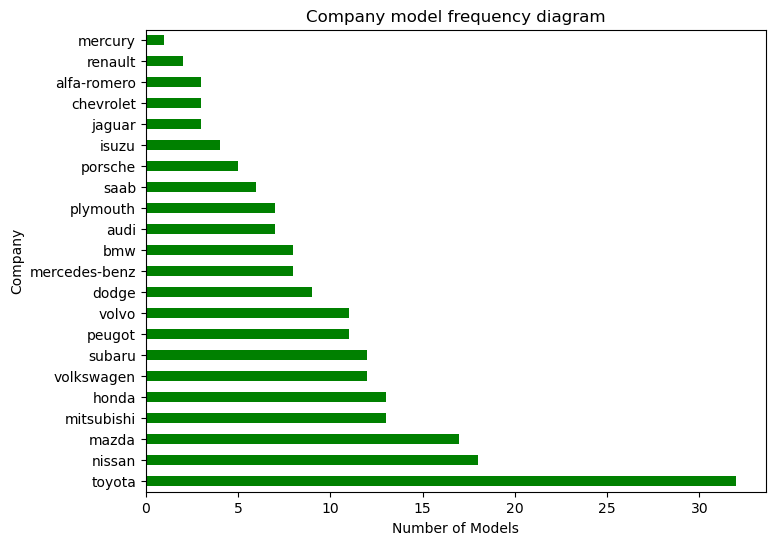

In [72]:
plt.figure(figsize=(8,6))
df['make'].value_counts().plot(kind='barh',color="green")
plt.xlabel('Number of Models')
plt.ylabel('Company')
plt.title("Company model frequency diagram")
plt.show()

# Usage as per fuel type
Fuel type in this dataset are gas and diesel 
Cars of gas fuel-type are used more by people as compared to diesel fuel-type

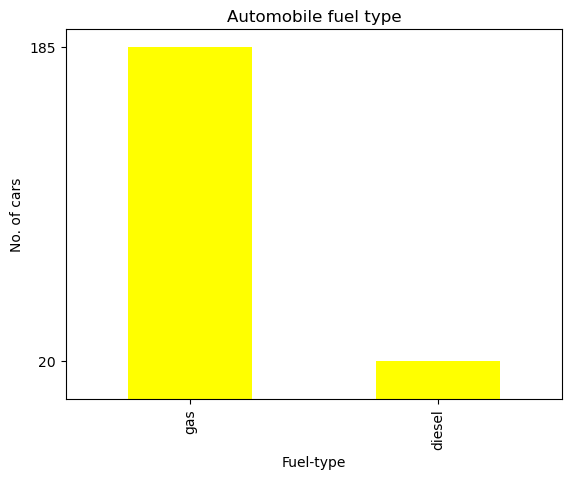

In [73]:
df["fuel-type"].value_counts().plot(kind="bar",color="yellow")
c=df["fuel-type"].value_counts()
plt.yticks(c)   # to get exact data points of value count
plt.xlabel("Fuel-type")
plt.ylabel("No. of cars")
plt.title("Automobile fuel type")
plt.show()

# Bodystyle and fuel-type visualization
Max stucture of car sedan is with diesel fuel-type which is preferred by customers
while the body-style with gas is very rarely preferred

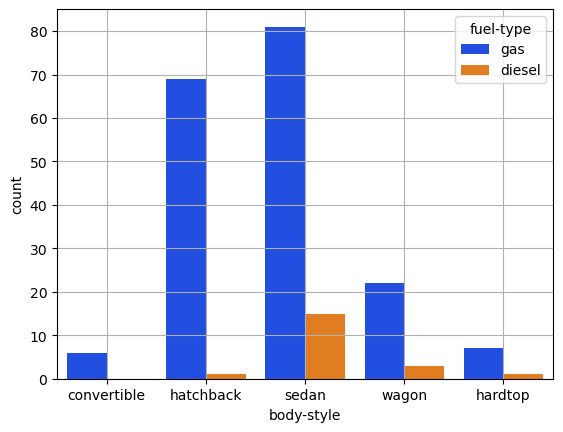

In [74]:
sns.countplot(data=df,x="body-style",hue="fuel-type",palette="bright")
plt.grid(True)
plt.show()

# Here we can conculde that car with engine type ohc having Drive wheel of fwd with gas fuel-type and sedan body - style should be maufactured more which will have more demand as this package is preferred more by customers

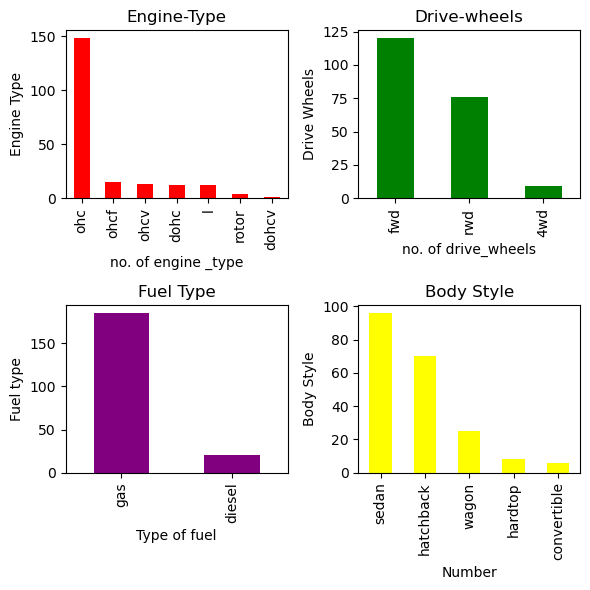

In [75]:
plt.figure(1)
plt.subplot(2,2,1)
df["engine-type"].value_counts().plot(figsize=(6,6),kind="bar",color="red")
plt.title("Engine-Type")
plt.xlabel("no. of engine _type")
plt.ylabel("Engine Type")

plt.subplot(2,2,2)
df["drive-wheels"].value_counts().plot(figsize=(6,6),kind="bar",color="green")
plt.title("Drive-wheels")
plt.xlabel("no. of drive_wheels")
plt.ylabel("Drive Wheels")

plt.subplot(2,2,3)
df["fuel-type"].value_counts().plot(figsize=(6,6),kind="bar",color="purple")
plt.title("Fuel Type")
plt.xlabel("Type of fuel")
plt.ylabel("Fuel type")

plt.subplot(2,2,4)
df["body-style"].value_counts().plot(figsize=(6,6),kind="bar",color="yellow")
plt.title("Body Style")
plt.xlabel("Number")
plt.ylabel("Body Style")

plt.tight_layout()
plt.show()

# body-style of hardtop is preferred very less by customers

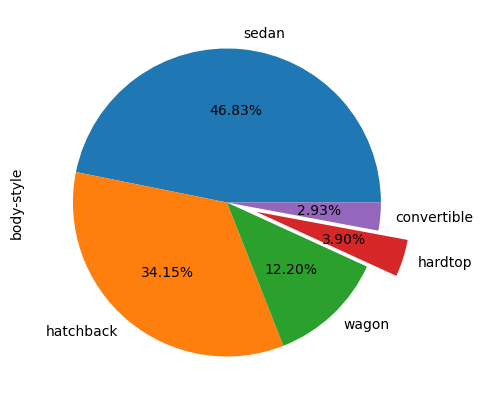

In [76]:
e1=[0,0,0,0.2,0]
df["body-style"].value_counts().plot(figsize=(5,5),kind="pie",autopct="%.2f%%",explode=e1)
plt.show()

# make and drive wheels visualization
Manufacturig company toyota of drive wheel fwd should be manufactured more as its the prefect choice for every type of customers

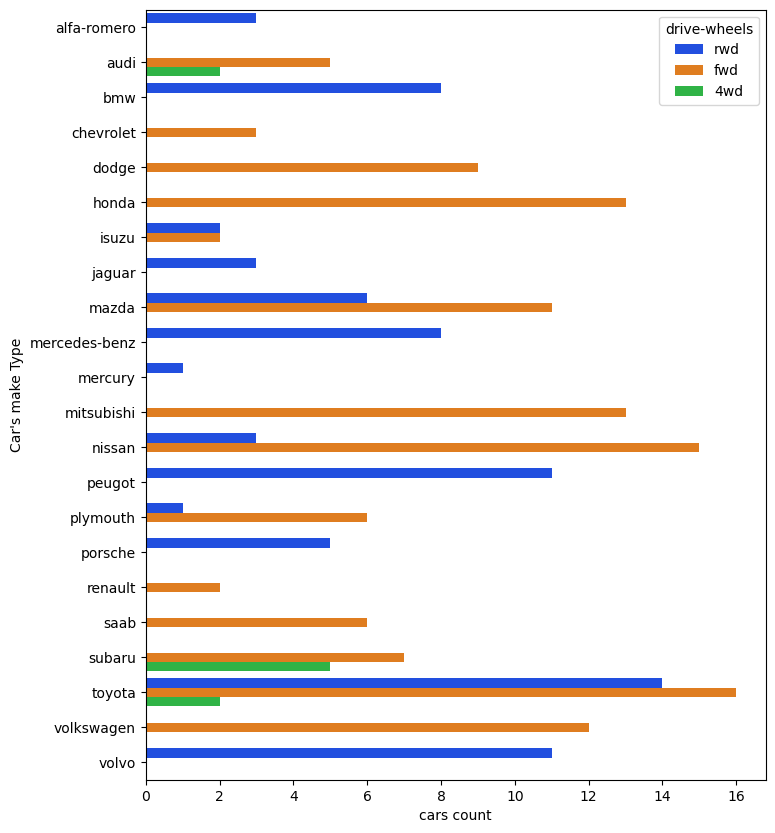

In [77]:
plt.figure(figsize=(8,10))
sns.countplot(data=df,y="make",hue="drive-wheels",palette="bright")
plt.ylabel("Car's make Type")
plt.xlabel('cars count')
plt.show()

# Outliers
# Boxplot of output price with respect to make
# Here we can see that company dodge , honda , isuzu , mitsubishi ,plymouth , toyota has outliers

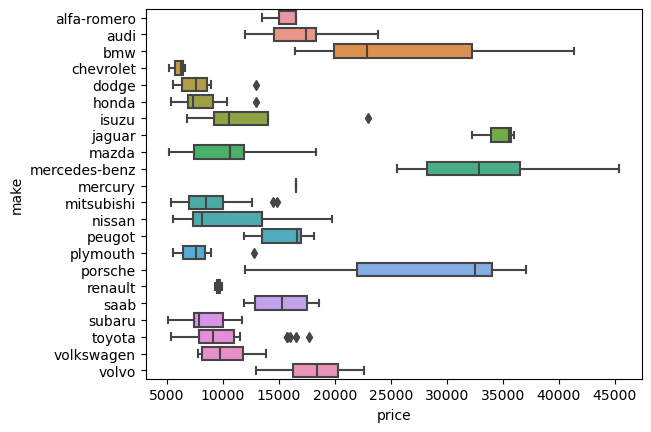

In [78]:
sns.boxplot(data=df,x="price",y="make")
plt.show()

# checking skewness 

In [79]:
colname=features.select_dtypes(["int64","float64"]).columns

In [80]:
from scipy.stats import skew
skew(features["normalized-losses"])

0.8485348696008058

symboling
0.20952469094997359


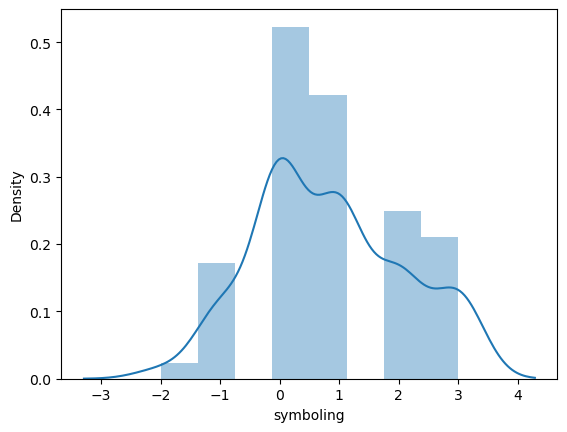

normalized-losses
0.8485348696008058


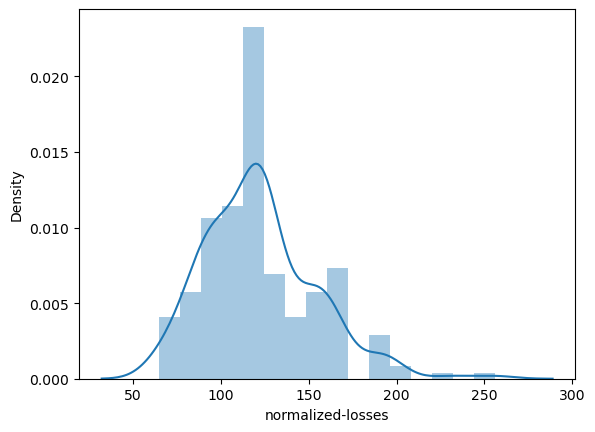

width
0.8973753485201392


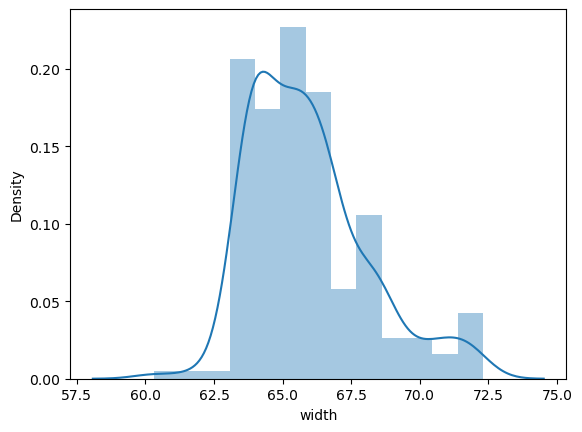

height
0.06265991683394276


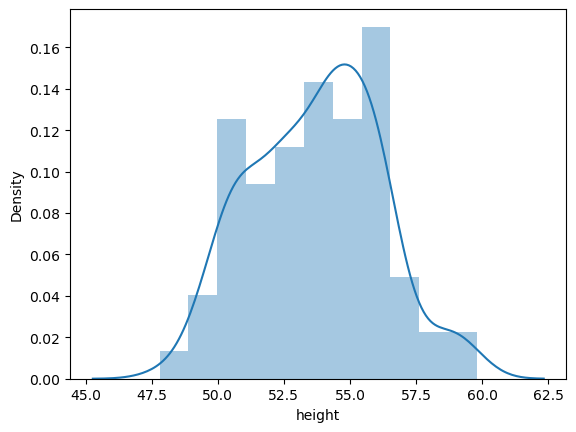

engine-size
1.9333748457840114


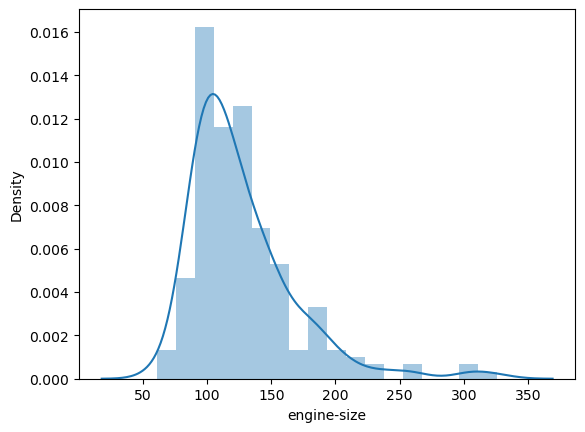

horsepower
1.3875147343096037


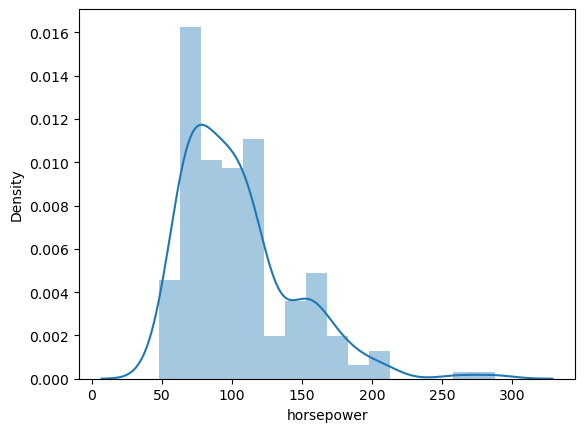

city-mpg
0.6588377533622138


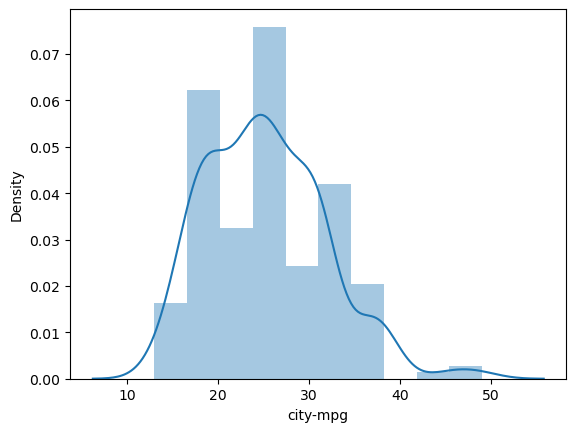

highway-mpg
0.5360379305163596


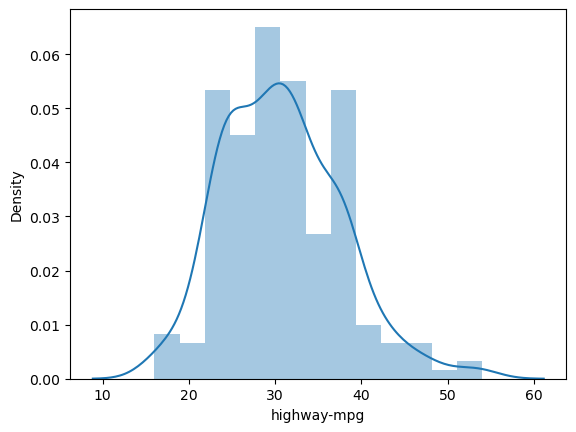

In [81]:
for col in colname:
    print(col)
    print(skew(features[col]))
    
    plt.figure()
    sns.distplot(features[col])
    plt.show()

In [82]:
cat_col=features.select_dtypes("object").columns
cat_col

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [83]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
features[cat_col]=oe.fit_transform(features[cat_col])

In [84]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
1,3,122.0,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
2,1,122.0,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26
3,2,164.0,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30
4,2,164.0,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22


In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
ss=StandardScaler()
features.iloc[:,:]=ss.fit_transform(features.iloc[:,:])

In [87]:
features.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,1.743470,0.000000,-1.948256,0.328798,-3.050975,1.213330,-0.121867,-0.844782,-2.020417,-2.865105,0.074449,0.171065,-0.646553,-0.546059
1,1.743470,0.000000,-1.948256,0.328798,-3.050975,1.213330,-0.121867,-0.844782,-2.020417,-2.865105,0.074449,0.171065,-0.646553,-0.546059
2,0.133509,0.000000,-1.948256,0.328798,-0.717207,1.213330,-0.121867,-0.190566,-0.543527,1.886890,0.604046,1.261807,-0.953012,-0.691627
3,0.938490,1.328961,-1.788499,0.328798,0.449677,-0.589081,-0.121867,0.136542,0.235942,-0.013908,-0.431076,-0.057230,-0.186865,-0.109354
4,0.938490,1.328961,-1.788499,0.328798,0.449677,-2.391492,-0.121867,0.230001,0.235942,-0.013908,0.218885,0.272529,-1.106241,-1.273900


In [88]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3,random_state=1)

In [89]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(xtrain,ytrain)
ypred=le.predict(xtest)

In [90]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(ytest,ypred))
print(r2_score(ytest,ypred))

12259459.688784523
0.7965566780397381


In [91]:
tr=le.score(xtrain,ytrain)
te=le.score(xtest,ytest)

print(f"trainnig score: {tr}\nTesting score:{te}")

trainnig score: 0.8504573774895474
Testing score:0.7965566780397381


In [92]:
from sklearn.neighbors import KNeighborsRegressor

knn= KNeighborsRegressor()
knn.fit(xtrain,ytrain)
y_pred=knn.predict(xtest)

In [93]:
print(mean_squared_error(ytest,ypred))
print(r2_score(ytest,y_pred))

12259459.688784523
0.8216457905555434


In [94]:
trainac=[]
testac=[]

for i in range(1,30):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    
    
    traina=knn.score(xtrain,ytrain)
    testa= knn.score(xtest,ytest)
    
    trainac.append(traina)
    testac.append(testa)

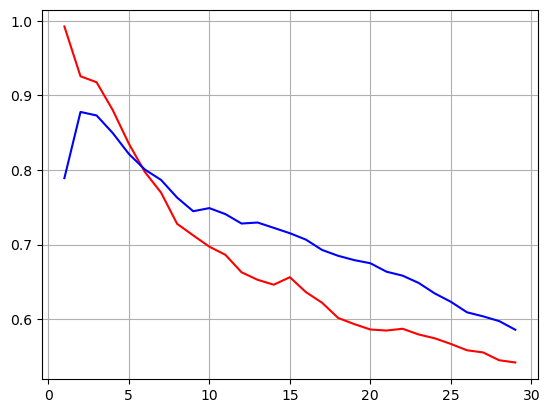

In [95]:
plt.plot(range(1,30),trainac,color="red")
plt.plot(range(1,30),testac,color="blue")
plt.grid()
plt.show()

In [96]:
knn=KNeighborsRegressor(n_neighbors=6)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [97]:
print(r2_score(ytest,ypred))

0.8005473566644357


In [98]:
te=knn.score(xtest,ytest)
tr=knn.score(xtrain,ytrain)

print(f"trainnig score: {tr}\nTesting score:{te}")

trainnig score: 0.7972681213383142
Testing score:0.8005473566644357


In [99]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)
rfr.fit(xtrain,ytrain)
ypred=rfr.predict(xtest)

In [100]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print(mean_squared_error(ytest,ypred))
print(r2_score(ytest,ypred))

6887485.262966755
0.8857035369077322


In [101]:
tr=rfr.score(xtrain,ytrain)
te=rfr.score(xtest,ytest)

print(f"trainnig score: {tr}\nTesting score:{te}")

trainnig score: 0.9706322362690989
Testing score:0.8857035369077322
